# Many OLS models will show correlations but do not confirm causality 

In [1]:
import random
import numpy as np
import pandas as pd

length = 100000
cols = ["P", "Q", "X", "Y", "Z"]
mu = 0
sigma = 5


lst_dct = {col:[] for col in cols}
for i in range(length):
    lst_dct["P"].append(25 + np.random.normal(mu, .5 * sigma))
    lst_dct["Q"].append(50 + np.random.normal(mu, sigma))
    lst_dct["X"].append(3 * lst_dct["Q"][-1]  + np.random.normal(mu, sigma ))
    lst_dct["Y"].append(lst_dct["Q"][-1] * -1 +  np.random.normal(mu, sigma))
    lst_dct["Z"].append(
        lst_dct["P"][-1] * 2 +  1.5 * lst_dct["X"][-1] -  lst_dct["Y"][-1] * 2 +  np.random.normal(mu,  sigma))

df = pd.DataFrame(lst_dct)
df

,P,Q,X,Y,Z
0,24.714560,43.172994,133.781708,-48.747036,346.608739
1,22.810783,50.870333,147.339026,-51.197218,372.389437
2,23.394329,52.222211,154.948162,-63.918352,402.978546
3,22.775957,55.607901,166.378367,-63.405637,418.157188
4,25.351509,51.785867,151.756510,-55.118782,386.856898
...,...,...,...,...,...
99995,23.937953,55.703315,163.125149,-55.216275,407.255173
99996,28.568434,50.158670,144.746317,-45.118865,359.948951
99997,22.957482,49.067530,144.420200,-38.719714,342.961049
99998,23.464232,49.166296,149.070744,-50.966699,373.618322


<AxesSubplot:xlabel='Q', ylabel='Z'>

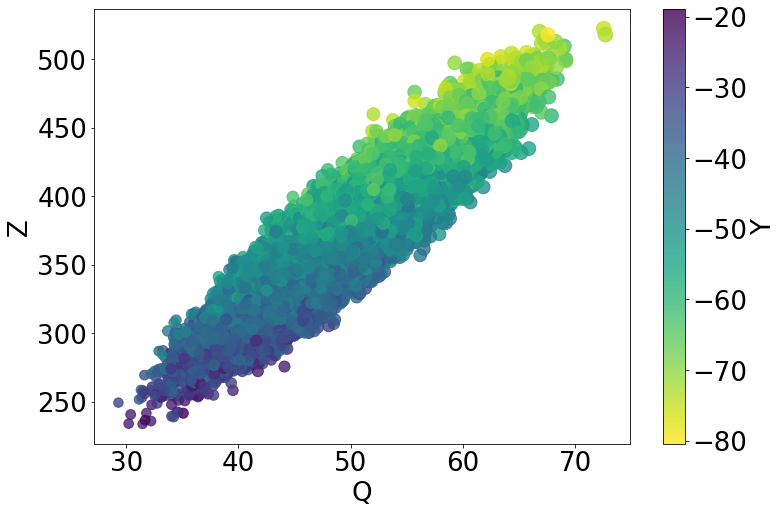

In [2]:
import matplotlib.pyplot as plt
# We can visualize the correlation of these variables on four dimensions:
#     2 dimensions in x-y space, a 3rd dimension using size and a fourth using color
plt.rcParams.update({"font.size":26})
fig, ax = plt.subplots(figsize = (12,8))
df.plot.scatter(x = "Q", y = "Z", c = "Y",s = "X", cmap = "viridis_r",alpha = .8, ax = ax)

In [3]:
df.corr()

,P,Q,X,Y,Z
P,1.000000,-0.000238,-0.000691,-0.001442,0.140764
Q,-0.000238,1.000000,0.948878,-0.705518,0.914763
X,-0.000691,0.948878,1.000000,-0.668480,0.934195
Y,-0.001442,-0.705518,-0.668480,1.000000,-0.844608
Z,0.140764,0.914763,0.934195,-0.844608,1.000000


We will use these correlation values to control correlation of some variables so that they accurately depict overall correlations

In [4]:
import statsmodels.api as sm

In [5]:
residuals = {}
for y_var in df.keys():
    x_vars = list(df.keys())
    x_vars.remove(y_var)
    print(y_var, x_vars)
    X = df[x_vars]
    X["Constant"] = 1
    y = df[y_var]
    model = sm.OLS(y, X)
    results = model.fit()
    print(results.summary())
    residuals[y_var] = results.resid
    residuals = pd.DataFrame(residuals)

P ['Q', 'X', 'Y', 'Z']
                            OLS Regression Results                            
Dep. Variable:                      P   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                 2.485e+04
Date:                Tue, 02 Nov 2021   Prob (F-statistic):               0.00
Time:                        19:35:18   Log-Likelihood:            -1.9877e+05
No. Observations:              100000   AIC:                         3.976e+05
Df Residuals:                   99995   BIC:                         3.976e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Q              0.0012      0.

In [6]:
residuals

,P,Q,X,Y,Z
0,0.105328,-2.285619,1.791079,-1.524597,-1.019582
1,-1.940342,1.489814,-3.177081,1.273189,3.355003
2,0.200049,-0.399486,1.360625,-3.980639,-4.075460
3,-0.183790,-0.085935,1.606191,-3.082024,-3.768309
4,0.599121,0.839258,-0.314097,-1.359656,-1.723348
...,...,...,...,...,...
99995,-1.601115,1.647341,-3.200039,1.794686,4.266428
99996,2.921504,2.037150,0.324289,-0.804503,-4.551390
99997,-1.762222,1.623680,-2.242243,3.257128,2.963281
99998,-1.057881,-0.666535,-0.039580,0.087749,1.136583


In [7]:
import pingouin
df.pcorr().round(2)

,P,Q,X,Y,Z
P,1.00,0.00,-0.59,0.63,0.71
Q,0.00,1.00,0.50,-0.14,-0.00
X,-0.59,0.50,1.00,0.74,0.83
Y,0.63,-0.14,0.74,1.00,-0.89
Z,0.71,-0.00,0.83,-0.89,1.00


C:\Users\jzach\anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.4.0, the latest is 0.5.0.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


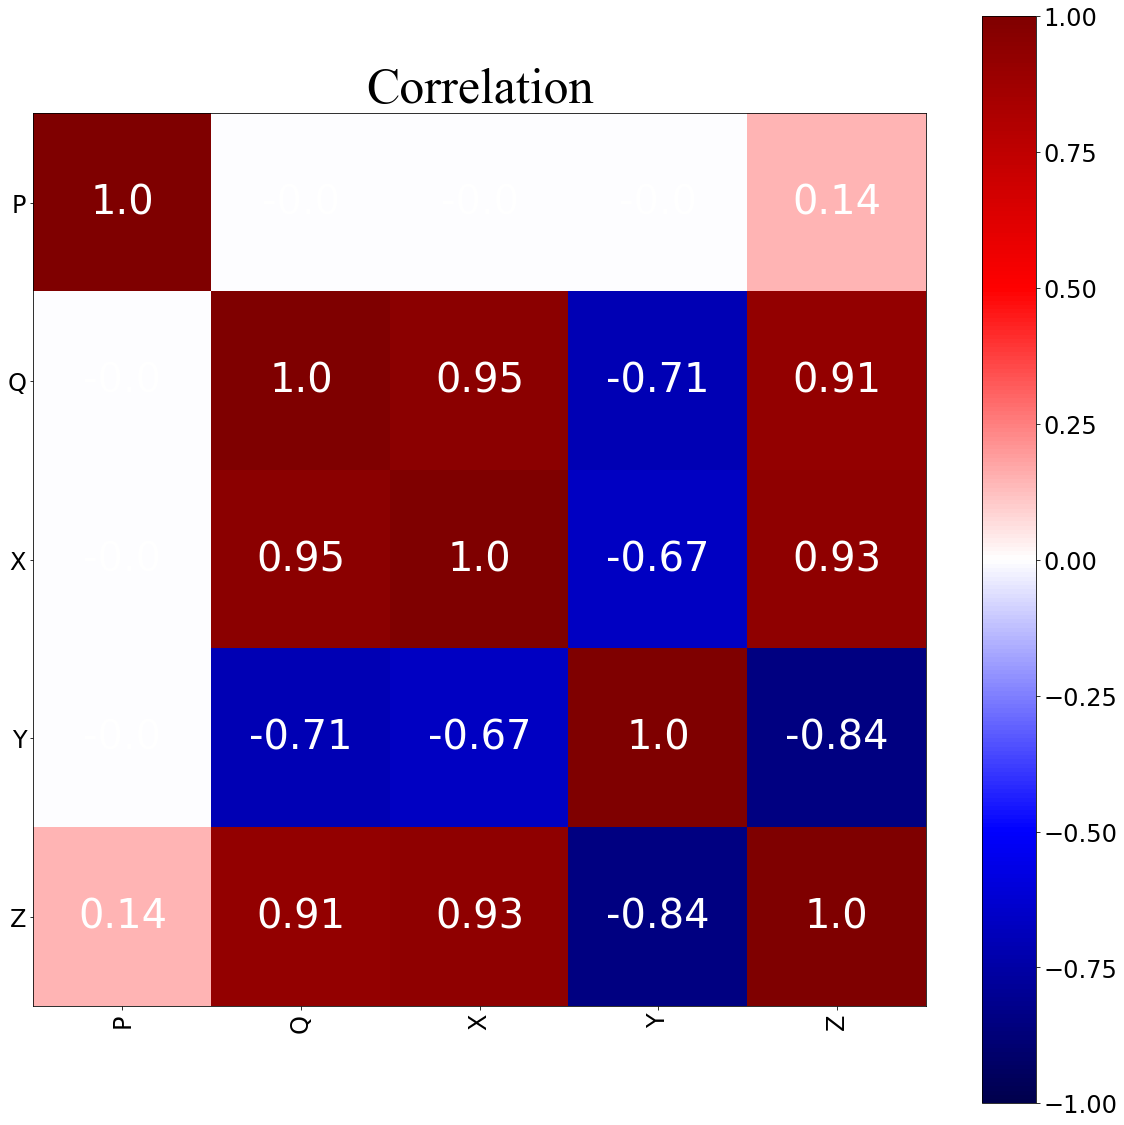

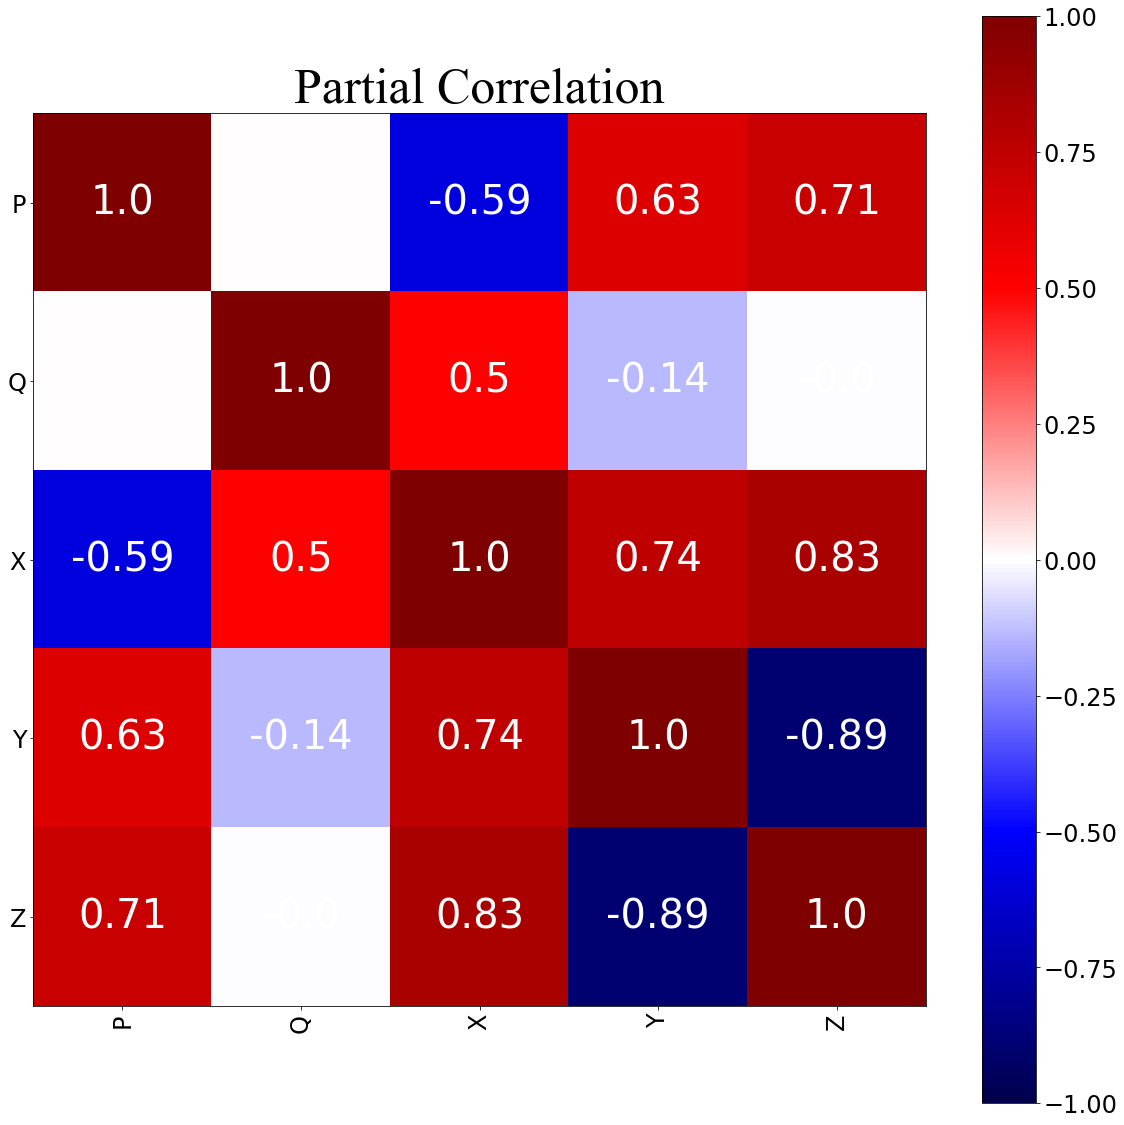

In [8]:
from datlib.plots import *
corr_matrix_heatmap(df.corr(), 
                    save_fig = False, 
                    pp = None, 
                    title = "Correlation")
corr_matrix_heatmap(df.pcorr(), save_fig = False, pp = None, title = "Partial Correlation")

In [9]:
residuals

,P,Q,X,Y,Z
0,0.105328,-2.285619,1.791079,-1.524597,-1.019582
1,-1.940342,1.489814,-3.177081,1.273189,3.355003
2,0.200049,-0.399486,1.360625,-3.980639,-4.075460
3,-0.183790,-0.085935,1.606191,-3.082024,-3.768309
4,0.599121,0.839258,-0.314097,-1.359656,-1.723348
...,...,...,...,...,...
99995,-1.601115,1.647341,-3.200039,1.794686,4.266428
99996,2.921504,2.037150,0.324289,-0.804503,-4.551390
99997,-1.762222,1.623680,-2.242243,3.257128,2.963281
99998,-1.057881,-0.666535,-0.039580,0.087749,1.136583


we will now store our p values from  the pcorr graph 

In [10]:
pcorr_pvalues = {}
for y, Y in residuals.items():
    pcorr_pvalues[y] = {}
    for x, X in residuals.items():
        if x != y:
            pcorr_pvalues[y][x] = sm.OLS(Y,X).fit().pvalues[x]
        
        else:
            pcorr_pvalues[y][x] = np.NaN
pd.DataFrame(pcorr_pvalues).round(2)

,P,Q,X,Y,Z
P,NaN,0.75,0.0,0.0,0.00
Q,0.75,NaN,0.0,0.0,0.79
X,0.00,0.00,NaN,0.0,0.00
Y,0.00,0.00,0.0,NaN,0.00
Z,0.00,0.79,0.0,0.0,NaN


# Building Causual Skeletons
we now have the tools to construct our causal skeleton which visually portrays true causation

In [11]:
undirected_graph = {key:[] for key in df.keys()}
for x in undirected_graph:
    remaining_vars = [y for y in df.keys() if y != x]
    for y in remaining_vars:
        undirected_graph[x].append(y)

undirected_graph

{'P': ['Q', 'X', 'Y', 'Z'],
 'Q': ['P', 'X', 'Y', 'Z'],
 'X': ['P', 'Q', 'Y', 'Z'],
 'Y': ['P', 'Q', 'X', 'Z'],
 'Z': ['P', 'Q', 'X', 'Y']}

In [12]:
import copy
p_val = .01
def build_skeleton(df, undirected_graph):    
    def check_remaining_controls(control_vars, undirected_graph, x, y, controls_used) :
        for c_var in control_vars:
            # set c_used every time use cycle through a new control
            #  the program will then iterate through remaining controls
            #  until statistical significance is broken
            c_used = copy.copy(controls_used)
            if y in undirected_graph[x]:

                c_used.append(c_var)
                test = df.partial_corr(x = x, y = y, covar=c_used,
                                      method = "pearson")
                if test["p-val"].values[0] > p_val: 

                    undirected_graph[x].remove(y)
                    #breakout of the for 
                    break
                else:
                    remaining_controls = copy.copy(control_vars)
                    remaining_controls.remove(c_var)
                    # recursive function that iterates through remaining variables 
                    #  uses them as controls statistical significance holds without them,
                    #  otherwise break
                    check_remaining_controls(remaining_controls, undirected_graph, x, y, c_used)
                
    for x in df.keys():
        ys = undirected_graph[x]
        for y in df.keys():
            if x != y:
            # first check for correlation with no controls
                test = df.partial_corr(x = x, 
                                       y = y, 
                                       covar = None,
                                       method = "pearson") 
                if test["p-val"].values[0] > p_val:
                    undirected_graph[x].remove(y)
            # if correlated check for deseparation controlling for other variables
                else:
                    control_vars = [z for z in df.keys() if z != y and z != x]
                    check_remaining_controls(control_vars, undirected_graph, x, y, [])
    return undirected_graph

undirected_graph = build_skeleton(df, undirected_graph)                                   
undirected_graph

{'P': ['Z'],
 'Q': ['X', 'Y'],
 'X': ['Q', 'Z'],
 'Y': ['Q', 'Z'],
 'Z': ['P', 'X', 'Y']}

In [13]:
import matplotlib.cbook
import matplotlib.pyplot as plt
import networkx as nx
def graph_DAG(undirected_graph, df, title = "DAG Structure"):
    
    # generate partial correlation matrix to draw values from
    # for graph edges
    pcorr_matrix = df.pcorr()
    graph = nx.Graph()
    edges = []
    edge_labels = {}
    for key in undirected_graph:
        for key2 in undirected_graph[key]:
            if (key2, key) not in edges:
                edge = (key.replace(" ","\n"), key2[0].replace(" ","\n"))
                edges.append(edge)
                # edge label is partial correlation between
                # key and key2
                edge_labels[edge] = str(round(pcorr_matrix.loc[key][key2],2))

    # edge format: ("i", "j") --> from node i to node j
    graph.add_edges_from(edges)
    color_map = ["C0" for g in graph]

    fig, ax = plt.subplots(figsize = (20,12))
    graph.nodes()
    plt.tight_layout()
    pos = nx.spring_layout(graph)#, k = 5/(len(sig_corr.keys())**.5))

    plt.title(title, fontsize = 30)
    nx.draw_networkx(graph, pos, node_color=color_map, 
                     node_size = 1000,
                     with_labels=True,  arrows=False,
                     font_size = 20, alpha = 1,
                     font_color = "white",
                     ax = ax)
    nx.draw_networkx_edge_labels(graph,pos,
                                 edge_labels=edge_labels,
                                 font_color='green',
                                 font_size=20)
    plt.axis("off")
    plt.savefig("g1.png", format="PNG")
    plt.show()

In [14]:
#conda install matplotlib=2.1.1

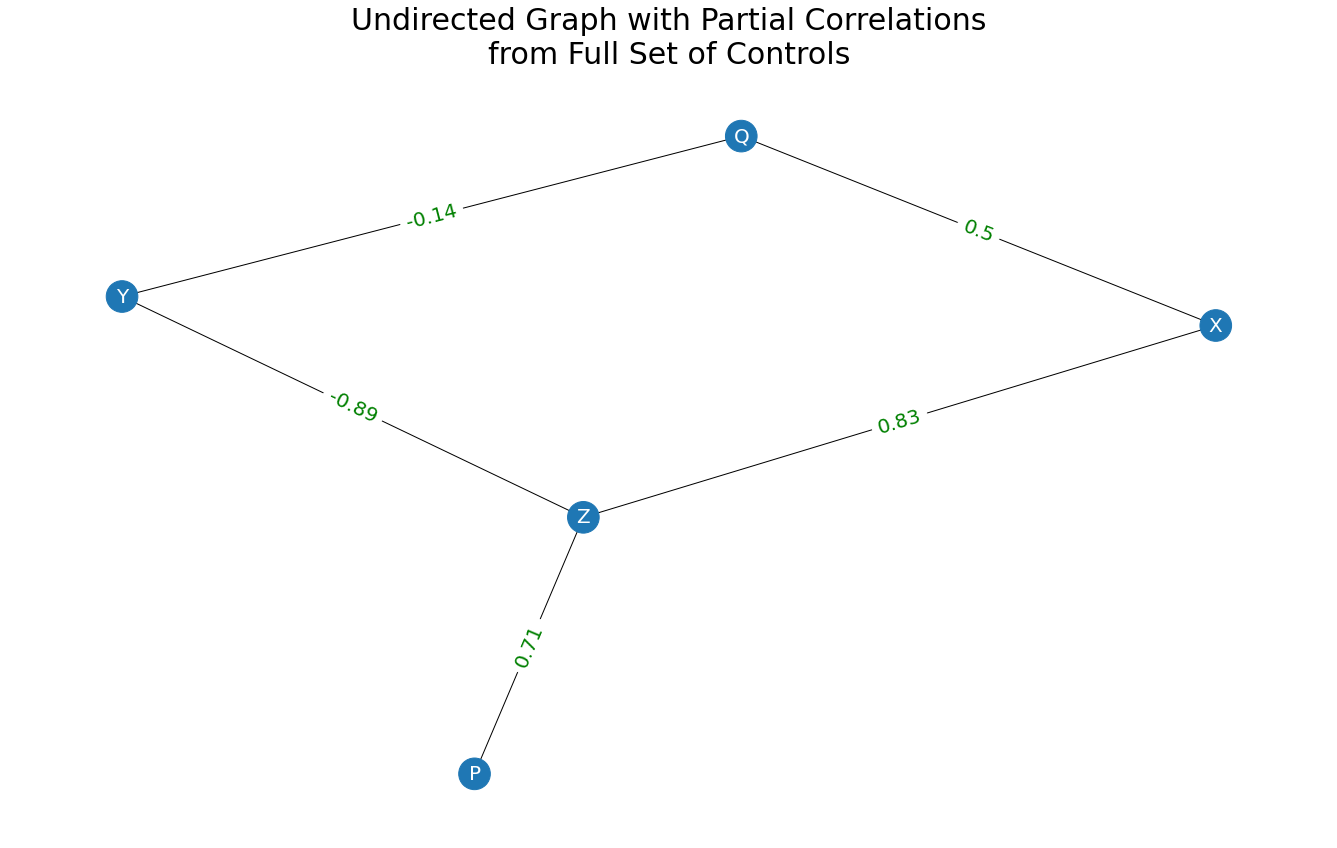

In [15]:
graph_DAG(undirected_graph, df, title = "Undirected Graph with Partial Correlations\nfrom Full Set of Controls")

In [16]:
# !pip install pgmpy

In [17]:
from pgmpy.estimators import PC
c = PC(df)
max_cond_vars = len(df.keys()) - 2


model = c.estimate(return_type = "dag",variant= "parallel",#"orig", "stable"
                   significance_level = p_val, 
                   max_cond_vars = max_cond_vars, ci_test = "pearsonr")
edges = model.edges()

  0%|          | 0/3 [00:00<?, ?it/s]

OutEdgeView([('Y', 'Z'), ('X', 'Z'), ('P', 'Z'), ('Q', 'Y'), ('Q', 'X')])

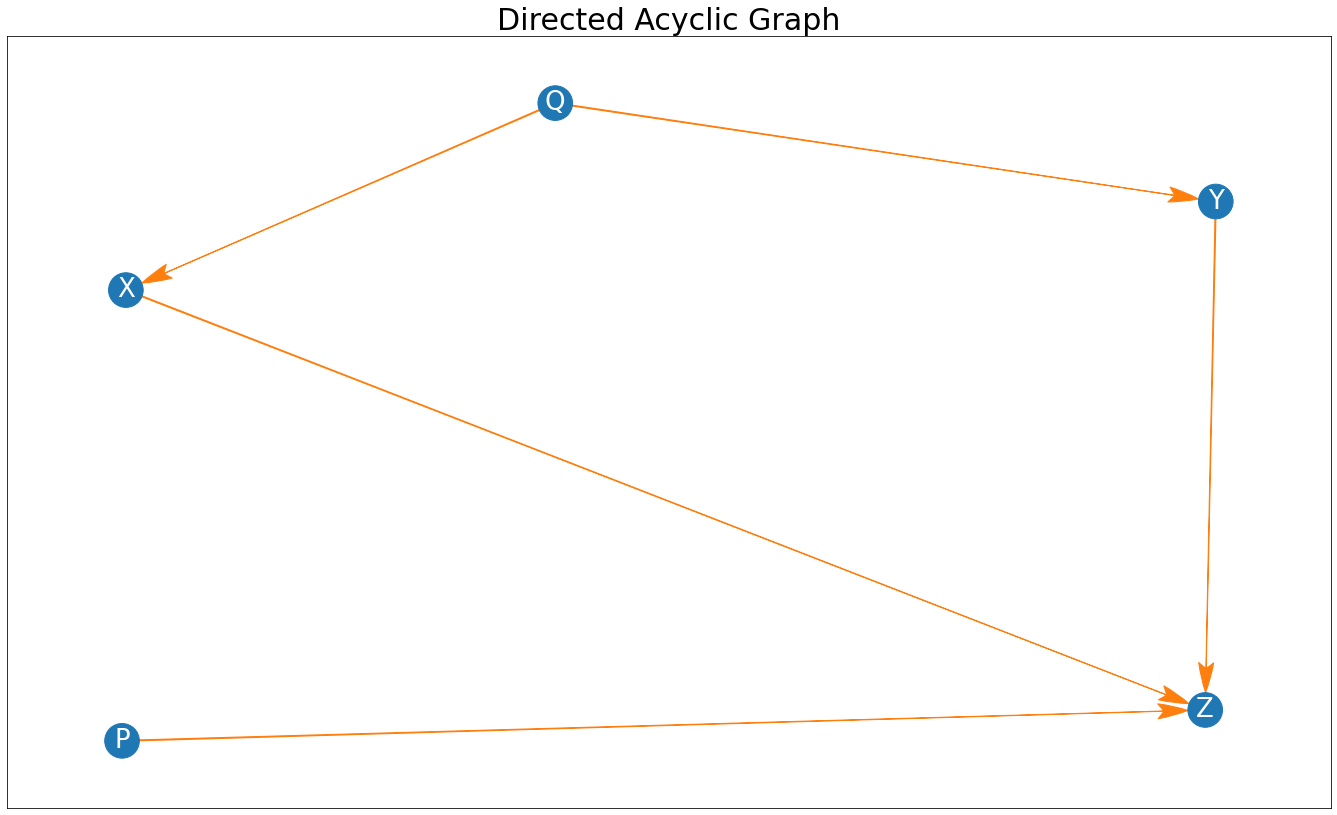

In [18]:
from matplotlib.patches import ArrowStyle

def graph_DAG(edges, df, title = ""):
    graph = nx.DiGraph()
    graph.add_edges_from(edges)
    color_map = ["C0" for g in graph]

    fig, ax = plt.subplots(figsize = (20,12))
    graph.nodes()
    plt.tight_layout()
    pos = nx.spring_layout(graph)#, k = 5/(len(sig_corr.keys())**.5))

    plt.title(title, fontsize = 30)
    nx.draw_networkx(graph, pos, node_color=color_map, node_size = 1200,
                     with_labels=True,  arrows=True,
                     font_color = "white",
                     font_size = 26, alpha = 1,
                     width = 1, edge_color = "C1",
                     arrowstyle=ArrowStyle("Fancy, head_length=3, head_width=1.5, tail_width=.1"), ax = ax)

graph_DAG(edges, df, title = "Directed Acyclic Graph")
edges

keep control: P
keep control: X
('Y', 'Z') ['P', 'X']
keep control: P
keep control: Y
('X', 'Z') ['P', 'Y']
keep control: X
keep control: Y
('P', 'Z') ['X', 'Y']
('Q', 'Y') []
('Q', 'X') []


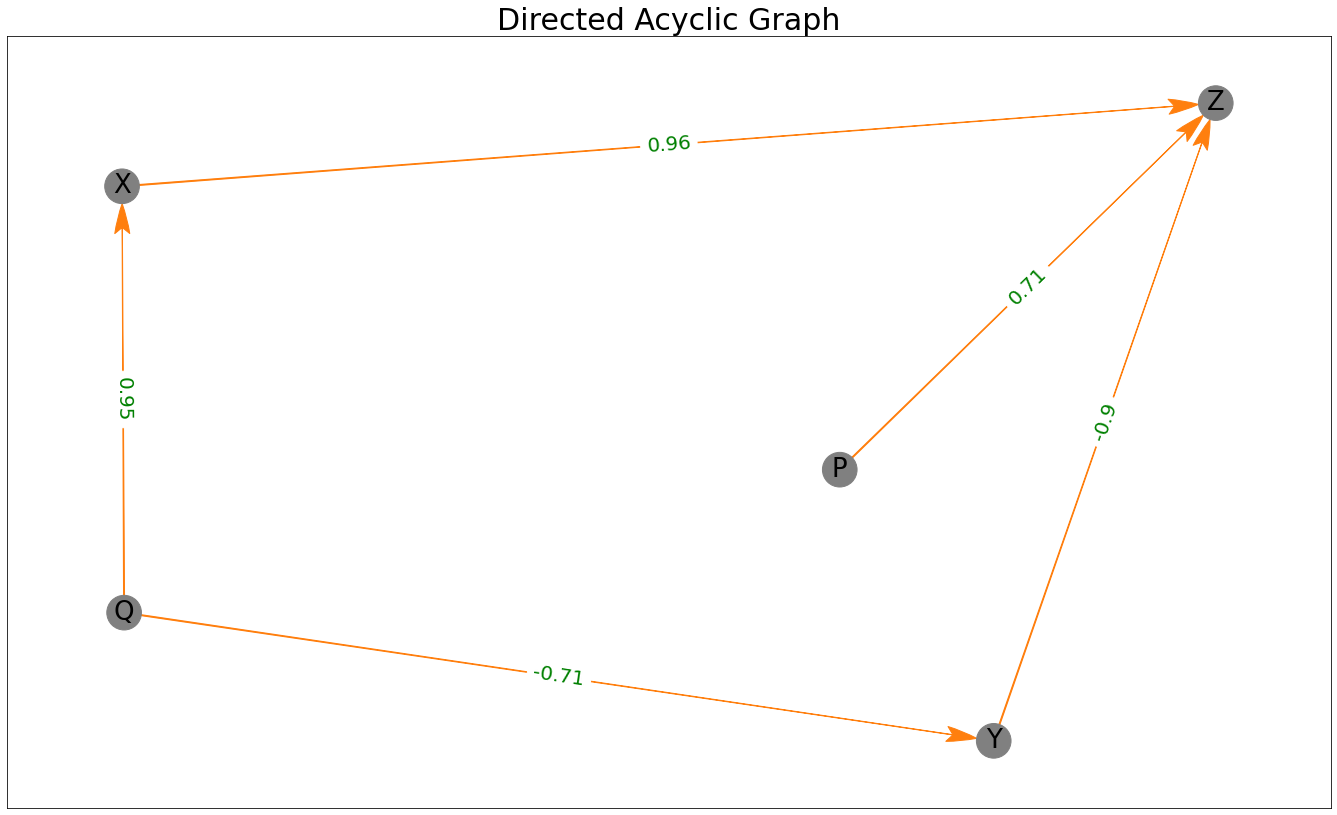

In [19]:
def graph_DAG(edges, df, title = ""):
    graph = nx.DiGraph()
    edge_labels = {}
    ############ Add ############
    for edge in edges:
        controls = [key for key in df.keys() if key not in edge]
        controls = list(set(controls))
        keep_controls = []
        for control in controls:
            control_edges = [ctrl_edge for ctrl_edge in edges if control == ctrl_edge[0] ]
            if (control, edge[1]) in control_edges:
                print("keep control:", control)
                keep_controls.append(control)                
        print(edge, keep_controls)
        pcorr = df[[edge[0], edge[1]]+keep_controls].pcorr()
#         corr_matrix_heatmap(pcorr, save_fig = False, pp = None, title = "Partial Correlation")
        edge_labels[edge] = str(round(pcorr[edge[0]].loc[edge[1]],2))
    graph.add_edges_from(edges)
    color_map = ["grey" for g in graph]

    fig, ax = plt.subplots(figsize = (20,12))
    graph.nodes()
    plt.tight_layout()
    pos = nx.spring_layout(graph)#, k = 5/(len(sig_corr.keys())**.5))

    plt.title(title, fontsize = 30)
    nx.draw_networkx(graph, pos, node_color=color_map, node_size = 1200,
                     with_labels=True,  arrows=True,
                     # turn text black for larger variable names in homework
                     font_color = "k",
                     font_size = 26, alpha = 1,
                     width = 1, edge_color = "C1",
                     arrowstyle=ArrowStyle("Fancy, head_length=3, head_width=1.5, tail_width=.1"), ax = ax)
    ############ Add ############
    nx.draw_networkx_edge_labels(graph,pos,
                                edge_labels=edge_labels,
                                font_color='green',
                                font_size=20)

graph_DAG(edges, df, title = "Directed Acyclic Graph")